# <center> Inteligencia Artificial y Aprendizaje </center> 
## <center> Práctica 1 </center> 
#### <center> *Ana San Román Gaitero y María González García* </center> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss

**a) Basándose en los histogramas, indique para cada variable el número de valores incorrectos o anómalos (valores outliers). También se puede utilizar z-score para cada muestra en el conjunto de datos y especificar un umbral (por ejemplo, 2,5, 3, 3,5 o más desviaciones estándar).**

**Explique el procedimiento seguido para obtener este número. A la vista de los resultados, detállese el proceso que se seguiría para poder aplicar los métodos de aprendizaje automático en este conjunto de datos.**

**b) Basándose en los histogramas, indique para cada variable analizada el número de valores que faltan (missing values). Explique el procedimiento seguido para obtener dicho número. A la vista de los resultados, detalle el proceso que seguiría para aplicar los métodos de aprendizaje automático a este conjunto de datos.**

**c) Si alguna de las variables analizadas presenta valores perdido, impute (sustituya) los valores faltantes por un estadístico dependiente de los atributos.**

Antes de empezar, se visualizan los valores, los histogramas y los boxplot de la base de datos para saber con que tipo de datos estamos trabajando y cual sería el procedimiento más adecuado.

In [2]:
data = pd.read_csv("pima_indian_diabetes.csv") 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


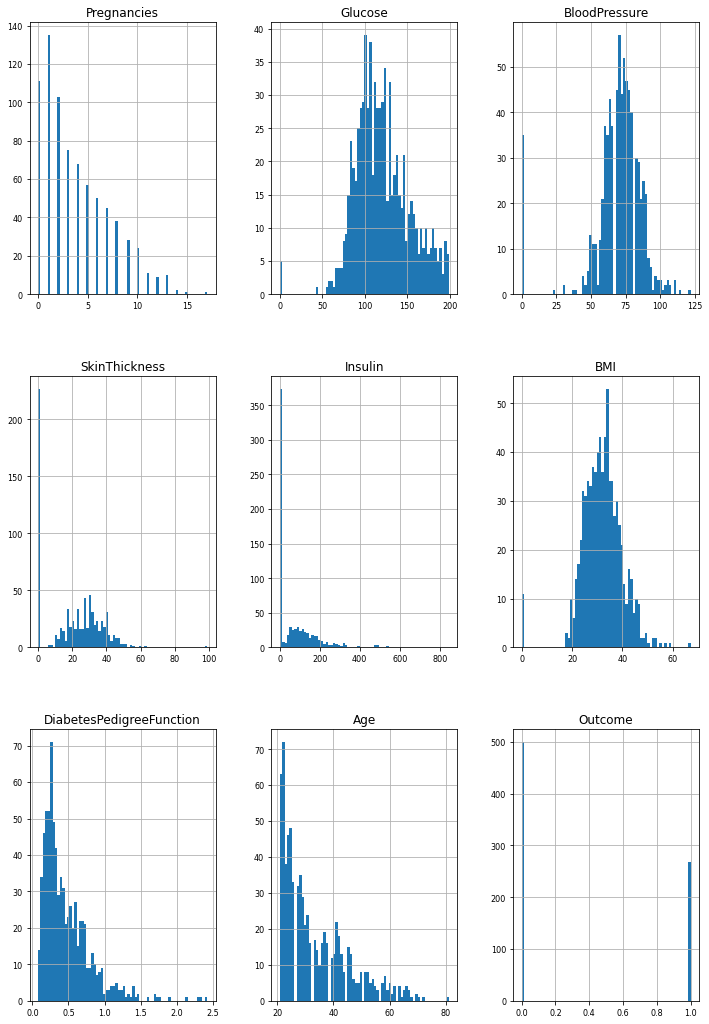

In [3]:
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

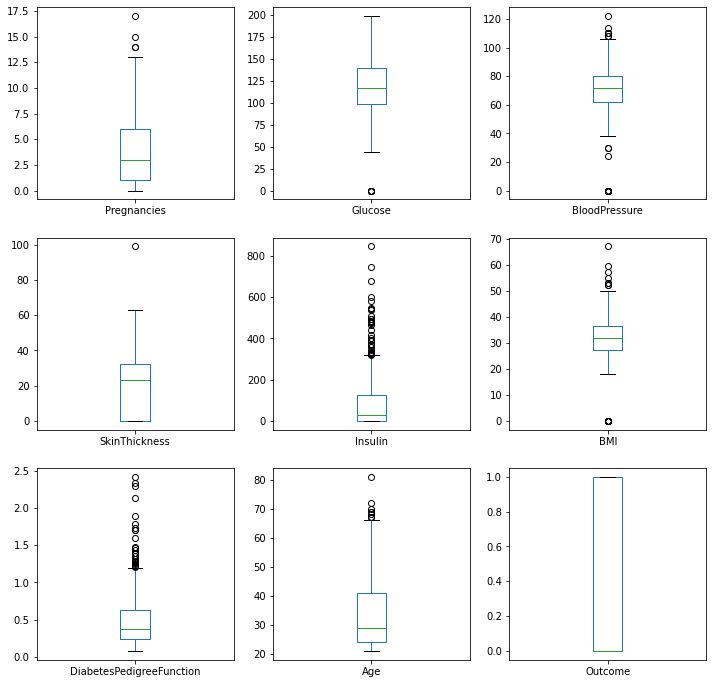

In [4]:
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12));

El primer paso es detectar los missing values para identificar mejor los outliers ya que una presencia significativa de missing values puede afectar al intervalo de z-score y que no los identifique correctamente.

Por una parte, en la tabla se puede observar que hay características que presentan un valor mínimo de 0, en algunas de ellas ese valor 0 no tiene sentido y nos indica que es un dato erróneo o un missing value. 

Por otro lado, observando los histogramas se confirma que en características como Glucose, BloodPressure, SkinThickness, Insulin y BMI hay una cantidad de 0 sin sentido.

Otro tipo de missing values pueden ser los valores nulos o NaN. Por ello, visualizamos si existe alguno de estos valores en alguna de las características:

In [5]:
data.isnull().any() 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Como no se han encontrado valores nulos, se calcula el número de missing values centrándose en dichos valores que no cobran sentido en cada una de las características nombradas anteriormente.

In [6]:
missing_values=(data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]==0).sum()
missing_values

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Se observa que Glucose, BloodPressure y BMI presentan pocos 0 y en cambio SkinThickness y Insulin tienen una gran cantidad de 0, incluso sobrepasando la mitad de sus datos.
Esto destaca que pueden ser necesarias diferentes estrategias para diferentes columnas. Por ejemplo asegurarnos si esa característica serviriría para entrenar el algoritmo, puesto que al tener tantos missing values y tan pocos datos útiles, la característica podría llegar a dar informacion errónea. En este caso, para SkinThickness e Insulin la estrategia podría ser eliminarla, sin embargo ya que para detectar diabeticos se consideran caracteristicas determinantes se deciden sustituir. Por otro lado, para Glucose, BloodPressure y BMI la imputación sería la mejor opción.

Para poder sustituir los valores perdidos por un estadístico, primero se reemplazan a valores nulos (NaN) para que sean ignorados en el cálculo de dicho estadístico por el que vamos a imputar.

In [7]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.nan)

Al haber imputado los missing values por NaN muchas características como Insulin y SkinThickness experimentan cambios significativos, pudiendo observarse mejor su limite superior e inferior y así tener una mejor idea para tratarlos.

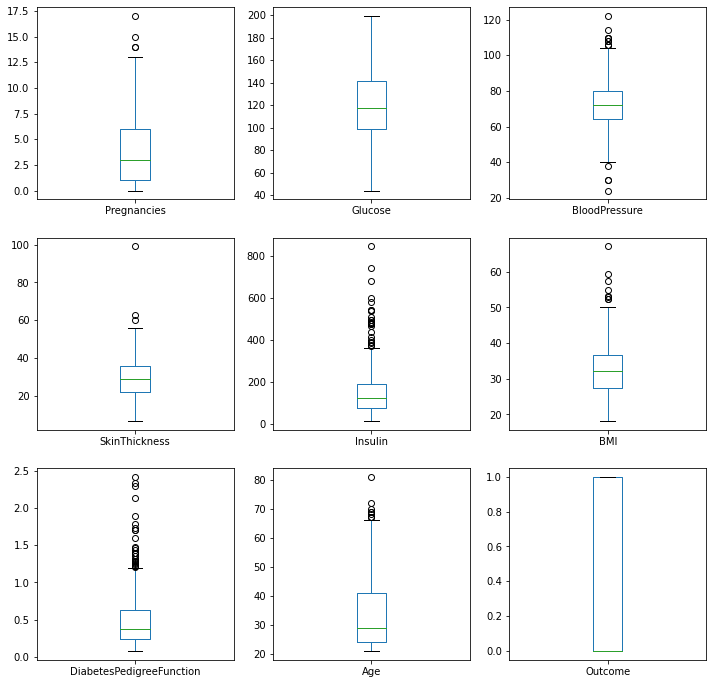

In [8]:
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12));

Antes de imputar los missing values por el estadístico, se repite el procedimiento para los outliers. Esto es para que el cálculo del estadistico no se vea afectado por la presencia de outliers.

Para detectar los outliers el primer paso es realizar una inspección visual a través de los histogramas y boxplots y localizar aquellos que sobresalen del rango normal de valores. El segundo paso es calcular el z-score sin normalizar y comprobar si cada valor se encuentra dentro de 2 o 3 veces la desviación típica. En el caso de que se encuentren fuera de ese intervalo se le considera outlier. 

Tras realizar un análisis visual a través de los histogramas y boxplots se ha concluido que el umbral que mejor funciona a la hora de detectar los outliers es 2.5, teniendo en cuenta todas las caracrterísticas.  

In [9]:
def outliers (datos): #Función z-score
    count=0
    lista=[]
    for i in data[datos]:
        if not (data[datos].mean()-2.5*data[datos].std())<=i<=(data[datos].mean()+2.5*data[datos].std()):
            if not np.isnan(i):
                count=count+1
                lista.append(i)
   
    return lista,count

In [10]:
p_outliers,b=outliers("Pregnancies")
print('El numero de outliers de Pregnancies es', b)

El numero de outliers de Pregnancies es 14


In [11]:
g_outliers,b=outliers("Glucose")
print('El numero de outliers de Glucosa es', b)

El numero de outliers de Glucosa es 2


In [12]:
b_outliers,b=outliers("BloodPressure")
print('El numero de outliers de BloodPressure es', b)

El numero de outliers de BloodPressure es 17


In [13]:
s_outliers,b=outliers("SkinThickness")
print('El numero de outliers de SkinThickness es', b)

El numero de outliers de SkinThickness es 4


In [14]:
i_outliers,b=outliers("Insulin")
print('El numero de outliers de Insulin es', b)

El numero de outliers de Insulin es 17


In [15]:
bmi_outliers,b=outliers("BMI")
print('El numero de outliers de BMI es', b)

El numero de outliers de BMI es 9


In [16]:
d_outliers,b=outliers("DiabetesPedigreeFunction")
print('El numero de outliers de DiabetesPedigreeFunction es', b)

El numero de outliers de DiabetesPedigreeFunction es 20


In [17]:
a_outliers,b=outliers("Age")
print('El numero de outliers de Age es', b)

El numero de outliers de Age es 21


El proceso a seguir para poder aplicar los métodos de aprendizaje automático en este conjunto de datos sería imputar los outliers, ya que el número de éstos es relativamente bajo.

A continuación, se reemplazan los outliers por valores nulos para poder calcular el estadístico posteriormente.

In [18]:
data[["Pregnancies"]]=data[["Pregnancies"]].replace(p_outliers,np.nan)

In [19]:
data[["Glucose"]]=data[["Glucose"]].replace(g_outliers,np.nan)

In [20]:
data[["BloodPressure"]]=data[["BloodPressure"]].replace(b_outliers,np.nan)

In [21]:
data[["SkinThickness"]]=data[["SkinThickness"]].replace(s_outliers,np.nan)

In [22]:
data[["Insulin"]]=data[["Insulin"]].replace(i_outliers,np.nan)

In [23]:
data[["BMI"]]=data[["BMI"]].replace(bmi_outliers,np.nan)

In [24]:
data[["DiabetesPedigreeFunction"]]=data[["DiabetesPedigreeFunction"]].replace(d_outliers,np.nan)

In [25]:
data[["Age"]]=data[["Age"]].replace(a_outliers,np.nan)

In [26]:
print(data.isnull().sum()) #Outliers + Missing values 

Pregnancies                  14
Glucose                       7
BloodPressure                52
SkinThickness               231
Insulin                     391
BMI                          20
DiabetesPedigreeFunction     20
Age                          21
Outcome                       0
dtype: int64


El siguiente paso es reemplazar los NaN (missing values y outlier detectados) por el estadítico mediana.

In [27]:
data.fillna(data.median(), inplace=True) 

In [28]:
print(data.isnull().sum()) #Se comprueba que ya no hay NaN

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Se comprueba que todos los outliers y los missing values han sido imputados.

**d) Visualice de nuevo los histogramas de las variables después de haber hecho la limpieza de datos. Explique los resultados obtenidos. ¿Considera necesario realizar siempre la imputación de
los valores perdidos? Justifique su respuesta.**

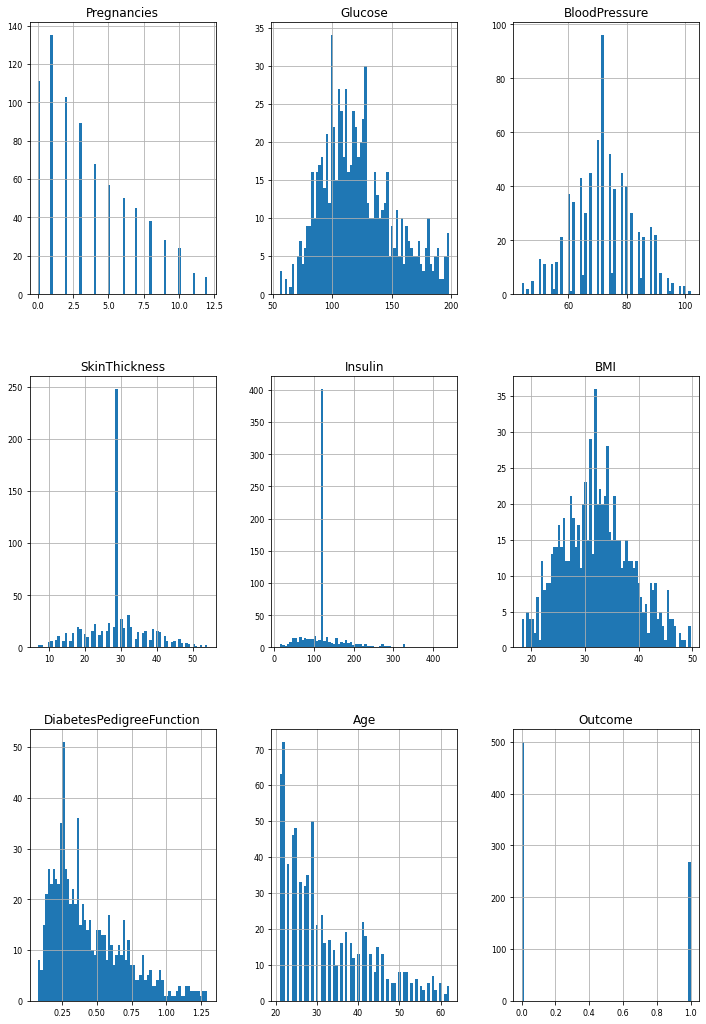

In [29]:
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8);

Tras realizar la limpieza de datos, la imputación de Pregnancie, Glucose, BMI, DiabetesPedigree, Age y BloodPressure sería una buena estrategia para deshacerse de los datos erróneos y missing values ya que sus distribuciones están mas proporcionadas y se encuentran en su rango normal de valores.

Sin embargo, al haber tantos missing values y tan pocos datos útiles en las  características Insulin y SkinThickness, después de imputar por la mediana, daría lugar a un sobreaprendizaje acerca de pacientes de un tipo.

Otra opción sería visualizar si existen personas con gran falta de datos en algunas características y eliminarlas.

**e)  Considere los dos tipos de normalización que se han visto en teoría: la normalización mín-máx y la normalización para obtener un conjunto de datos normalizados. Observe los histogramas de dos variables considerando los dos tipos de normalización anteriores. Justifique los resultados obtenidos, así como las ventajas y desventajas de cada tipo de normalización.**

In [30]:
normalizacion = (data-data.min())/(data.max()-data.min())
estandarizacion = (data - data.mean())/data.std()

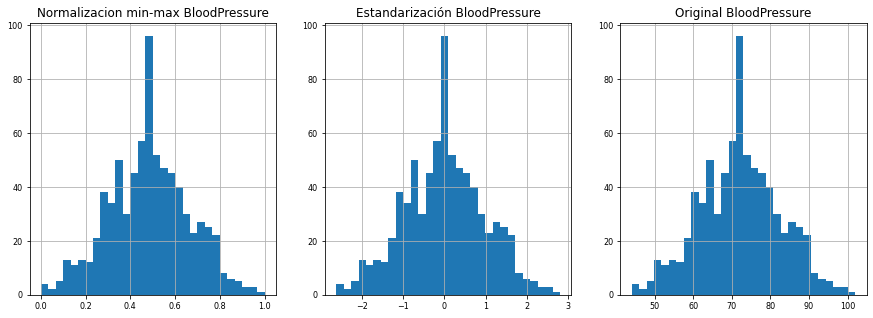

In [31]:
plt.subplot(131)
normalizacion['BloodPressure'].hist(figsize=(15, 5), bins=30, xlabelsize=8, ylabelsize=8);
plt.title('Normalizacion min-max BloodPressure')

plt.subplot(132)
estandarizacion['BloodPressure'].hist(figsize=(15, 5), bins=30, xlabelsize=8, ylabelsize=8);
plt.title('Estandarización BloodPressure')

plt.subplot(133)
plt.title('Original BloodPressure')
data['BloodPressure'].hist(figsize=(15, 5), bins=30, xlabelsize=8, ylabelsize=8);

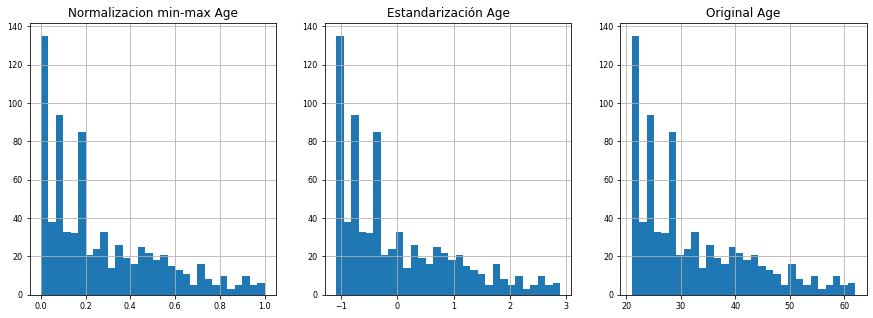

In [32]:
plt.subplot(131)
normalizacion['Age'].hist(figsize=(15, 5), bins=30, xlabelsize=8, ylabelsize=8);
plt.title('Normalizacion min-max Age')

plt.subplot(132)
estandarizacion['Age'].hist(figsize=(15, 5), bins=30, xlabelsize=8, ylabelsize=8);
plt.title('Estandarización Age')

plt.subplot(133)
plt.title('Original Age')
data['Age'].hist(figsize=(15, 5), bins=30, xlabelsize=8, ylabelsize=8);

**Normalización min max:**

Desventajas
- Es altamente susceptible a los outliers; por ejemplo si no se hubieran eliminado los outliers la distribución de los datos dependería tambien de dichos outliers.

Ventajas:
- Todas las variables están en un mismo rango, por lo que se podrían comparar entre sí y comprobar si existen o no relaciones entre ellas.
- Para variables que no siguen una distribucción gaussiana como Age es una normalización más adecuada con respecto a la estandarización ya que todas están acotadas entre 0 y 1.

**Estandatización normal:**

Desventajas:
- No es buena técnica para comparar características que no siguen una distribución gaussiana como Age ya que cada una tiene limites diferentes.

Ventajas:
- Como se observa en BloodPressure transforma los datos a una distribución mucho más sencilla y más conocida, la distribucion normal. Ésta deja a todas las características con la misma media 0 y varianza 1. Pudiendo compararlas entre sí. 
- Es menos susceptible a los outliers. En este caso, no se percibe ya que se han eliminado en anteriores apartados.
- Es la más utilizada ya que visualmente es más facil de analizar.

**f) Considere la característica llamada "Outcome". Indique si las clases están desbalanceadas. Si lo están, indique qué podría hacer para resolver este problema.**

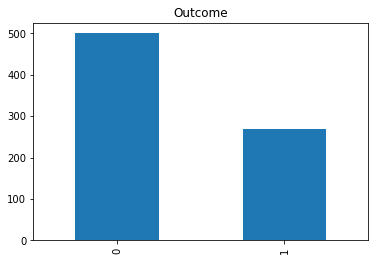

In [33]:
data['Outcome'].value_counts().plot.bar(title="Outcome");

Como se puede observar la característica Outcome está desbalanceada, hay muchos más datos de pacientes sin diabetes. Esto provocaría que el algoritmo está más entrenado para detectar pacientes sin diabetes a pacientes con diabetes. Para solventar este desequilibrio se utiliza el método Undersampling o el método Oversampling. 

El primero consiste en coger de manera aleatoria o estratificada un subconjunto de datos training de la clase mayoritaria (pacientes sin diabetes) que tenga la misma cantidad de datos que la clase minoritaria (pacientes con diabetes). Para que el algoritmo tenga en cuenta todos los datos, se repite este proceso varias veces y así nos aseguramos de que esté bien entrenado.

El segundo consiste en duplicar los datos de la clase minoritaria y añadirlos al conjunto de datos de entrenamiento. Dichos datos son elegidos de manera aleatoria.